
# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

## Trabajo práctico entregable - Parte 1

### Integrantes

- Fernando Camino
- Emanuel Nicolás Herrador
- Juana Rapoport
- Sebastián Stutz
- Juan Ignacio Szurlewicz


---
---

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


---



---



# ***Resolución***




## Librerias

En primer lugar, importaremos las librerías necesarias para trabajar el entregable. A priori, incorporaremos las que parecen útiles, si fuese necesario, podremos adicionar alguna otra en cualquier momento del desarrollo.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns

sns.set_context('talk')

## Lectura y análisis del dataset

Realizamos la lectura de nuestro dataset de trabajo, ya cargado en el repositorio de Github.

In [ ]:
file_url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(file_url)

Obtenemos una primera visualización del conjunto de datos a través de las primeras 3 lineas.

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis


Obtenemos el tamaño de la muestra

In [ ]:
_len=len(df)

print(f'El tamaño de nuestra encuesta es de {_len} casos')

El tamaño de nuestra encuesta es de 5805 casos


Extraemos las columnas que forman parte de nuestra encuesta, para seleccionar cuáles de ellas serán útiles para nuestro objeto de estudio,que es en este caso, conocer cuáles son los lenguajes de programación mejores pagos.

In [ ]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

## Ejercicio 1

Para un análisis más preciso acerca de la pregunta inicial, tomaremos una submuestra de la muestra inicial. El argumento para ello, es que el salario, además de poder tener una relación con el lenguaje de programación utilizado, creemos que puede estar influenciado por otras variables explicativas relevantes, cómo por ejemplo la cantidad de horas trabajadas y el tipo de contrato. Por ello, acotaremos nuestro estudio observacional, considerando dos tipos de contrato laboral específicos y una carga horaria en particular, reformulando la pregunta inicial de la siguiente manera:
***¿Cuáles son los lenguajes de programación asociados a los mejores salarios bajo la modalidad de contractor y freelance, en modalidad Full-Time?***

In [ ]:
df.work_contract_type.unique()

array(['Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Contractor', 'Freelance',
       'Participación societaria en una cooperativa'], dtype=object)

In [ ]:
df.work_dedication.unique()

array(['Full-Time', 'Part-Time'], dtype=object)

Luego, las columnas a considerar para el análisis serán:


*   `work_dedication`: Compararemos los salarios de personas que trabajan en IT utilizando distintos lenguajes de programación, teniendo en cuenta el mismo tiempo de trabajo. Consideraremos una dedicación *FULL TIME*.
*   `work_contract_type`:Compararemos los salarios de personas que trabajan en IT utilizando distintos lenguajes de programación, teniendo en cuenta dos tipos de contrato. Consideraremos un contrato *CONTRACTOR y FREELANCE*.
*   `salary_monthly_NETO`: Tomamos el salario percibido por los trabajadores.
*   `salary_monthly_BRUTO`: Consideramos el salario bruto percibido para realizar la limpieza de valores extremos o inválidos.
*   `tools_programming_languages`: Analizamos los lenguajes que conocen y utilizan.





Desde luego que existen otras variables que pueden influenciar los resultados a obtener, cómo por ejemplo, los años de experiencia laboral, pero suponemos que las observaciones de esta encuesta son aleatorias e identicamente distribuidas. Caso contrario, si por ejemplo, todos los programadores que utilizan Python que están en la muestra fuesen Junior, y el resto Senior, llegariamos posiblemente a la conclusión errónea de que el lenguaje Python es peor remunerado que los demás.

In [ ]:
# Columnas relevantes de estudio.
relevant_columns = [
    'work_dedication',
    'work_contract_type',
    'salary_monthly_NETO',
    'tools_programming_languages'
  ]

**Comenzamos filtrando el Dataframe, tomando como caso de estudio la modalidad de trabajo "Contractor" y el dedicación "Fulltime"**

In [ ]:
# Filtramos para obtener sub-muestra de estudio y eliminamos aquellos casos en # los que no haya una respuesta en la columna de sueldo mensual neto, ya que es
# nuestra variable principal de análisis.

df_filtered = df.loc[(df['work_contract_type'].isin(['Freelance', 'Contractor'])) & (df['work_dedication'] == 'Full-Time')].dropna(subset='salary_monthly_NETO')

df_filtered

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
10,Argentina,Chaco,Full-Time,Contractor,300000.0,298000.0,NaN,NaN,No,No recibo bono,...,En curso,Tecnicatura Superior en Programación,UTN - Universidad Tecnológica Nacional,Terminar encuesta,NaN,NaN,NaN,NaN,30,Varón Cis
18,Argentina,Chaco,Full-Time,Contractor,1932000.0,1854720.0,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Incompleto,Carrera de grado en matemática computacional,NaN,Terminar encuesta,NaN,NaN,NaN,NaN,25,Mujer Cis
34,Argentina,Chaco,Full-Time,Contractor,345000.0,33000.0,Cobro todo el salario en dólares,490,No,No recibo bono,...,Completo,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,25,Varón Cis
51,Argentina,Chaco,Full-Time,Contractor,336150.0,300000.0,Cobro todo el salario en dólares,NaN,De uno a tres sueldos,Performance individual,...,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,24,Varón Cis
52,Argentina,Chaco,Full-Time,Contractor,150000.0,150000.0,Cobro todo el salario en dólares,Blue,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,Mujer Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,Argentina,Tucumán,Full-Time,Freelance,205.0,205.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,Mujer Cis
5781,Argentina,Tucumán,Full-Time,Contractor,1000000.0,900000.0,Cobro todo el salario en dólares,490,No,No recibo bono,...,Completo,Ninguno autodidacta,UTN - Universidad Tecnológica Nacional,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,30,Varón Cis
5784,Argentina,Tucumán,Full-Time,Freelance,250000.0,225000.0,NaN,NaN,No,No recibo bono,...,Completo,Tecnicatura en Computación,UTN - Universidad Tecnológica Nacional,Responder sobre guardias,No,0.0,Bruto,Terminar encuesta,42,Varón Cis
5800,Argentina,Tucumán,Full-Time,Contractor,327000.0,275000.0,Cobro parte del salario en dólares,260,No,No recibo bono,...,En curso,Tecnicatura Superior en Programación,UTN - Universidad Tecnológica Nacional,Terminar encuesta,NaN,NaN,NaN,NaN,29,Hombre


Mediante el comando describe(), obtenemos las medidas de posición para entender la distribución de los datos y evaluar la presencia de valores outliers y posibles valores erróneos.

In [ ]:
# Obtener el resumen estadístico sin notación científica

with pd.option_context('display.float_format', '{:.2f}'.format):
    print(df_filtered.describe())

       salary_monthly_BRUTO  salary_monthly_NETO  \
count                792.00               792.00   
mean             1306245.12           1244757.73   
std              1995516.03           2080021.78   
min                    1.00                 1.00   
25%               304500.00            291738.50   
50%               808000.00            705000.00   
75%              1900000.00           1800000.00   
max             45000000.00          45000000.00   

       salary_percentage_inflation_adjustment  \
count                                  792.00   
mean                                    12.78   
std                                     30.10   
min                                      0.00   
25%                                      0.00   
50%                                      0.00   
75%                                     20.00   
max                                    600.00   

       salary_comparison_last_semester  salary_satisfaction  \
count                     

Adicionamos un Boxplot para observar la distribución de la variable Salario Mensual Neto.

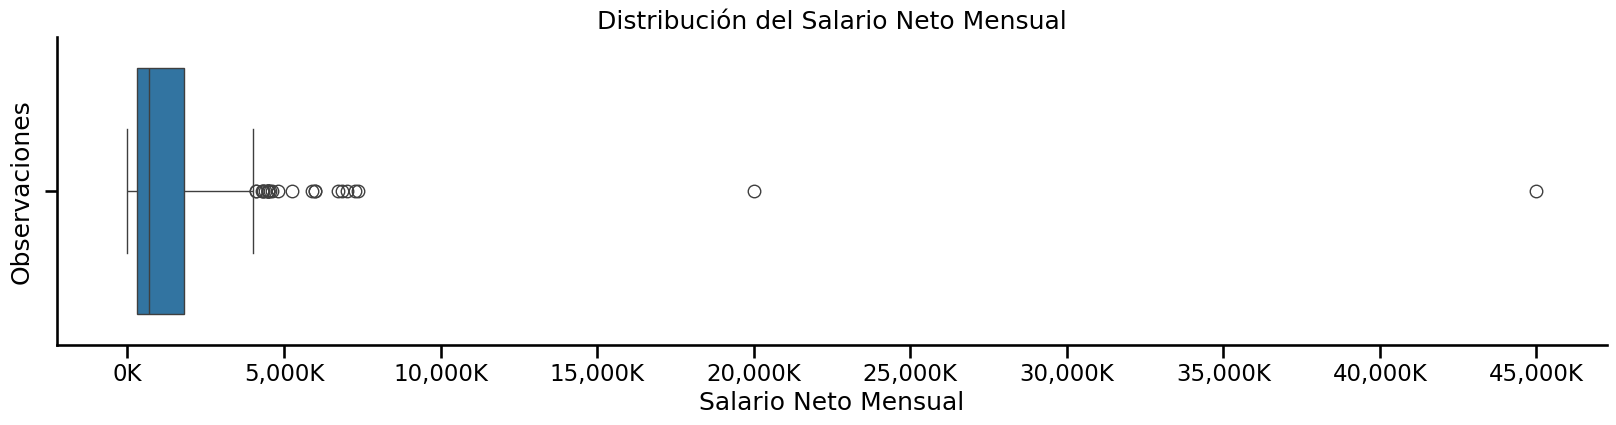

In [ ]:
# Crear el boxplot con los datos filtrados
plt.figure(figsize=(20, 4))

g = sns.boxplot(x=df_filtered['salary_monthly_NETO'])
sns.despine()

plt.xlabel('Salario Neto Mensual')
plt.ylabel('Observaciones')
plt.title('Distribución del Salario Neto Mensual')

# Para que los ticks del eje x se vean mejor y con K para indicar miles
tick_diff = 5_000_000
g.set_xticks(np.arange(0, df_filtered['salary_monthly_NETO'].max() + tick_diff, tick_diff))
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

plt.show()

Podemos observar que existen valores outliers muy extremos, cómo el máximo de $45.000.000, otro valor cercano a $20.000.000 y el valor mínimo de la muestra igual a 1. Podemos considerar, cómo un método para no considerar dichos valores, un percentil determinado que nos permita excluirlos del anális.

In [ ]:
df_filtered['salary_monthly_NETO'].quantile([.95, .96, .97, .98, .99])
# -> Obtenemos el salario que se encuentra en el límite del cuartil 97.

0.95    3500000.0
0.96    3697776.0
0.97    4104320.0
0.98    4500000.0
0.99    6000000.0
Name: salary_monthly_NETO, dtype: float64

In [ ]:
df_filtered['salary_monthly_NETO'].quantile([0.05, 0.04, 0.03, 0.02, 0.01])
# -> Obtenemos el salario que se encuentra en el límite del cuartil 0.01.


0.05    2744.00
0.04    1992.00
0.03     818.25
0.02     448.34
0.01     218.65
Name: salary_monthly_NETO, dtype: float64

Vamos a considerar entonces, las observaciones que se encuentran entre el percentil 0.01 y el percentil 0.97, excluyendo los valores atípicos de ambas colas de la distribución. Es decir, vamos a considerar aquellas observaciones que estan por encima el 1% que menos gana y por debajo el 97% que más gana.


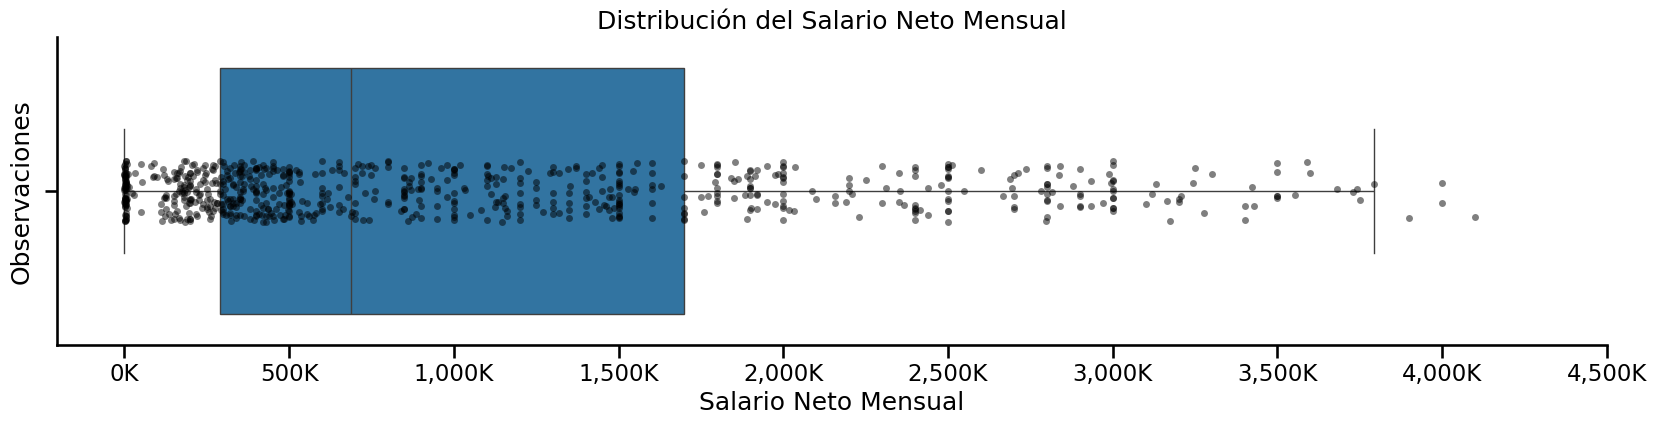

In [ ]:
# Crear el boxplot con los datos filtrados
_min_value = 218.65
_max_value = 4_104_320

df_filtered = df_filtered[(df_filtered['salary_monthly_NETO'] <= _max_value) & (df_filtered['salary_monthly_NETO'] >= _min_value)]

# Gráfico
plt.figure(figsize=(20, 4))

g = sns.boxplot(x=df_filtered['salary_monthly_NETO'], showfliers=False)
sns.stripplot(x=df_filtered['salary_monthly_NETO'], color='black', alpha=0.5)
sns.despine()

plt.xlabel('Salario Neto Mensual')
plt.ylabel('Observaciones')
plt.title('Distribución del Salario Neto Mensual')

# Para que los ticks del eje x se vean mejor y con K para indicar miles
tick_diff = 500_000
g.set_xticks(np.arange(0, df_filtered['salary_monthly_NETO'].max() + tick_diff, tick_diff))
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

plt.show()

Por último, obtenemos el listado de los lenguajes de programación contestados por los encuestados y analizamos cuáles de ellos son los mas utilizados. Para ello, probamos tres códigos que dan iguales resultados

**A)**

In [ ]:
df_filtered['tools_programming_languages']=df_filtered['tools_programming_languages'].str.lower().replace('ninguno de los anteriores', '')
df_filtered['tools_programming_languages']=df_filtered['tools_programming_languages'].astype(str).str.strip()

# Initialize an empty list to store all languages
all_languages = []

# Iterate over each row in the 'languages' column
for languages_string in df_filtered['tools_programming_languages']:
    # Split the string by ','
    languages_list = languages_string.split(',')
    # Strip leading and trailing whitespace from each language and append to the 'all_languages' list
    all_languages.extend([lang.strip() for lang in languages_list])

all_languages

_df_languages = pd.DataFrame({'Language': all_languages})
_df_languages=_df_languages[_df_languages['Language']!='']
_df_languages_count=_df_languages.Language.value_counts().reset_index().rename(columns={'index': 'language', 'tools_programming_languages': 'frequency'})
_df_languages_count


<ipython-input-61-f0e44ac6187d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tools_programming_languages']=df_filtered['tools_programming_languages'].str.lower().replace('ninguno de los anteriores', '')
<ipython-input-61-f0e44ac6187d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tools_programming_languages']=df_filtered['tools_programming_languages'].astype(str).str.strip()


,Language,count
0,javascript,402
1,sql,314
2,html,256
3,typescript,215
4,python,203
5,css,180
6,bash/shell,118
7,php,114
8,java,96
9,.net,78


**B)**

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_filtered.loc[:, 'cured_programming_languages'] = df_filtered.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
_df_languages = df_filtered.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_filtered[relevant_columns])\
    .rename(columns={0: 'programming_language'})
language_count = _df_languages.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count

<ipython-input-62-5924c35da516>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'cured_programming_languages'] = df_filtered.tools_programming_languages\


,frequency,count
0,javascript,402
1,sql,314
2,html,256
3,typescript,215
4,python,203
5,css,180
6,bash/shell,118
7,php,114
8,java,96
9,.net,78


**C)**

In [ ]:
# Creamos una copia y separamos los lenguajes de programación duplicando los valores del salario neto
_df_per_language = df_filtered.copy()
_df_per_language['tools_programming_languages'] = _df_per_language['tools_programming_languages'].str.split(',')
_df_per_language = _df_per_language.explode('tools_programming_languages')

# Sacamos los espacios iniciales y finales que tengan los strings de los lenguajes
_df_per_language['tools_programming_languages'] = _df_per_language['tools_programming_languages'].str.strip()

# Sacamos las filas con "Ninguno de los anteriores"
_df_per_language = _df_per_language[_df_per_language['tools_programming_languages'] != 'ninguno de los anteriores']

# Hacemos el conteo de los lenguajes
_language_count = _df_per_language['tools_programming_languages'].value_counts().reset_index().rename(columns={'tools_programming_languages': 'language'})
_language_count

,language,count
0,javascript,402
1,sql,314
2,html,256
3,typescript,215
4,python,203
5,css,180
6,bash/shell,118
7,php,114
8,java,96
9,,90


Observamos que Javascript, Sql y HTML son los lenguajes de programación más populares.
Seleccionaremos como muestra objetivo los primeros 20 lenguajes más utilizados según la encuesta.


In [ ]:
language_count = language_count.head(20)
_lenguajes = language_count['frequency'].to_list()
_lenguajes

# Filtramos el DataFrame que contiene la información de salarios con la lista armada.

df_final = _df_languages[_df_languages['programming_language'].isin(_lenguajes)]
df_final

,programming_language,work_dedication,work_contract_type,salary_monthly_NETO,tools_programming_languages,cured_programming_languages
10,bash/shell,Full-Time,Contractor,298000.0,"bash/shell, javascript, php, sql, typescript","[bash/shell, javascript, php, sql, typescript]"
10,javascript,Full-Time,Contractor,298000.0,"bash/shell, javascript, php, sql, typescript","[bash/shell, javascript, php, sql, typescript]"
10,php,Full-Time,Contractor,298000.0,"bash/shell, javascript, php, sql, typescript","[bash/shell, javascript, php, sql, typescript]"
10,sql,Full-Time,Contractor,298000.0,"bash/shell, javascript, php, sql, typescript","[bash/shell, javascript, php, sql, typescript]"
10,typescript,Full-Time,Contractor,298000.0,"bash/shell, javascript, php, sql, typescript","[bash/shell, javascript, php, sql, typescript]"
...,...,...,...,...,...,...
5800,c#,Full-Time,Contractor,275000.0,".net, c#, sql","[.net, c#, sql]"
5800,sql,Full-Time,Contractor,275000.0,".net, c#, sql","[.net, c#, sql]"
5802,java,Full-Time,Contractor,1150000.0,"java, javascript, sql","[java, javascript, sql]"
5802,javascript,Full-Time,Contractor,1150000.0,"java, javascript, sql","[java, javascript, sql]"


Y filtamos el Dataframe para quedarnos finalmente con las columnas que son de nuestro interés.


In [ ]:
df_final = df_final[['programming_language','salary_monthly_NETO']].reset_index().drop(columns={'index'})

df_final

,programming_language,salary_monthly_NETO
0,bash/shell,298000.0
1,javascript,298000.0
2,php,298000.0
3,sql,298000.0
4,typescript,298000.0
...,...,...
2207,c#,275000.0
2208,sql,275000.0
2209,java,1150000.0
2210,javascript,1150000.0


Obtenemos la media y la mediana para cada lenguaje de programación y graficamos ambas, junto con la media y mediana de la muestra total.

In [ ]:
# Establecer la opción de visualización para evitar la notación científica
pd.set_option('display.float_format', None)
_measures = df_final.groupby(['programming_language'])['salary_monthly_NETO'].agg(['mean', 'median'])

# Renombrar las columnas para mayor claridad
_measures.columns = ['mean_salary', 'median_salary']
_measures=_measures.reset_index()
_measures

,programming_language,mean_salary,median_salary
0,.net,1.038194e+06,650000.0
1,bash/shell,1.224556e+06,920000.0
2,c,1.253518e+06,1026150.0
3,c#,1.034646e+06,650000.0
4,c++,1.354605e+06,850000.0
5,css,9.583065e+05,517813.0
6,go,1.778935e+06,1800000.0
7,groovy,1.463066e+06,1325000.0
8,html,9.548439e+05,534500.0
9,java,1.125496e+06,805000.0


<ipython-input-67-a1d58ed21ba3>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


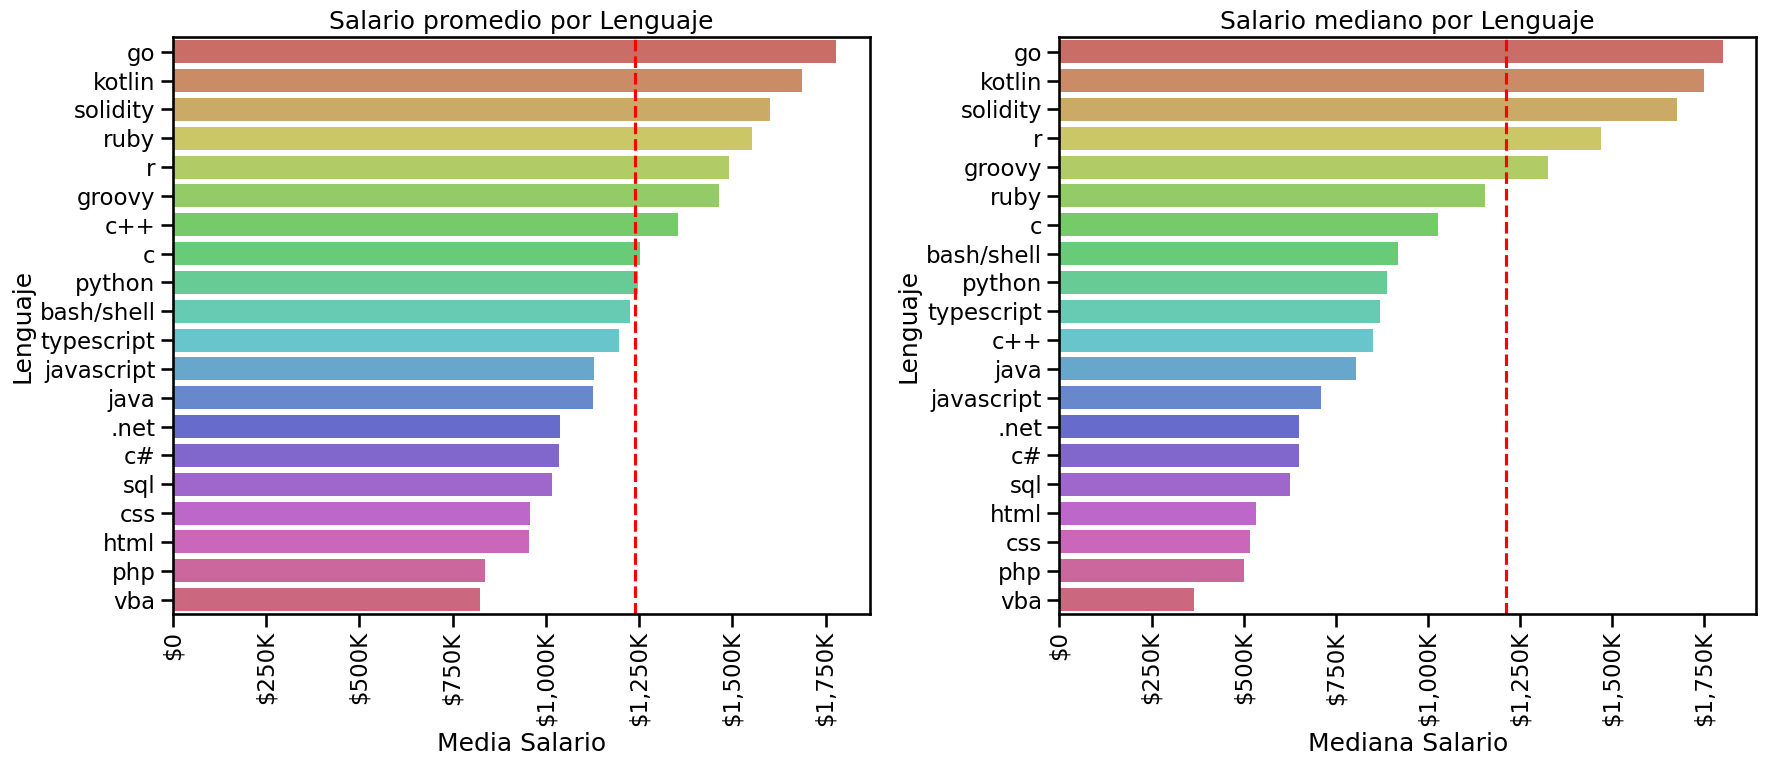

In [ ]:
# Ordenar los datos por la media de los salarios
_measures_mean_sorted = _measures.sort_values(by='mean_salary', ascending=False)

# Ordenar los datos por la mediana de los salarios
_measures_median_sorted = _measures.sort_values(by='median_salary', ascending=False)

# Calcular la media de todos los lenguajes
media_total = _measures['mean_salary'].mean()

# Calcular la media de todos los lenguajes
mediana_total = _measures['mean_salary'].median()

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de barras para la media de los salarios
sns.barplot(data=_measures_mean_sorted, y="programming_language", x="mean_salary", palette="hls", hue='programming_language', ax=axes[0])
axes[0].set_xlabel('Media Salario')
axes[0].set_ylabel('Lenguaje')
axes[0].set_title('Salario promedio por Lenguaje')

# Agregar una línea para la media total
axes[0].axvline(x=media_total, color='red', linestyle='--', label='Media Total')

# Gráfico de barras para la mediana de los salarios
sns.barplot(data=_measures_median_sorted, y="programming_language", x="median_salary", palette="hls", hue='programming_language', ax=axes[1])
axes[1].set_xlabel('Mediana Salario')
axes[1].set_ylabel('Lenguaje')
axes[1].set_title('Salario mediano por Lenguaje')

# Agregar una línea para la media total
axes[1].axvline(x=mediana_total, color='red', linestyle='--', label='Mediana Total')

# Formatear los números en formato de pesos
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x) if x < 1000 else '${:,.0f}K'.format(x/1000))
for ax in axes:
    ax.xaxis.set_major_formatter(formatter)

tick_diff = 5_000_000
g.set_xticks(np.arange(0, df_filtered['salary_monthly_NETO'].max() + tick_diff, tick_diff))
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

# Rotar las etiquetas del eje x en 90 grados
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

Si consideramos la media, el lenguaje mejor pago es el GO, seguido por Kotlin, Solidity y Ruby. Si observamos la mediana, podemos ver que en el 4to lugar queda R, y Ruby es desplazado.Por ende, los resultados cambian ante la presencia de valores más extremos que afectan a la media, aunque no en gran medida.

Podemos analizar la distribución del salario dentro de cada lenguaje, mediante un Boxplot, para hacer un análisis de variabilidad de los datos.

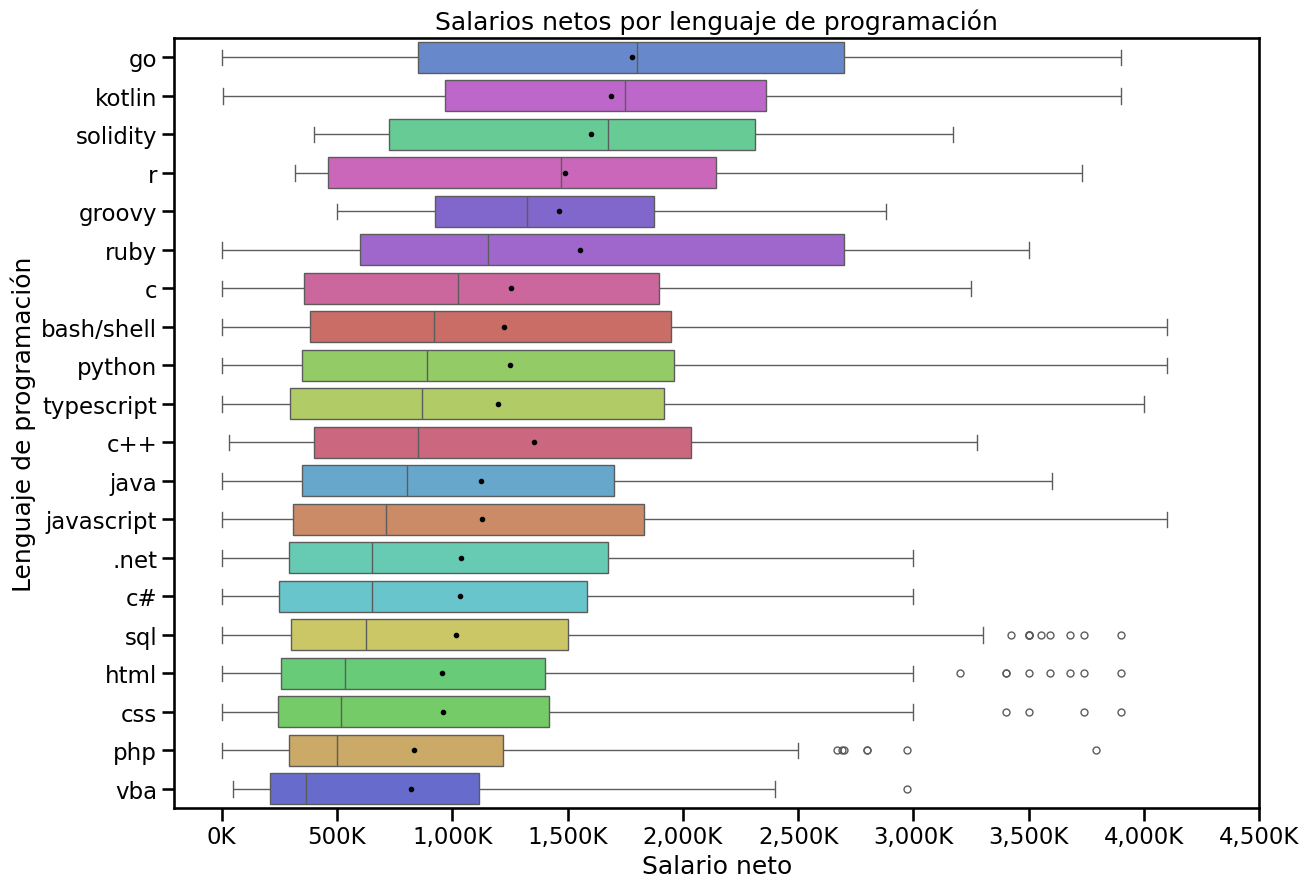

In [ ]:
# GRÁFICO: Vemos la distribución de los salarios netos por lenguaje con el BOXPLOT
# Los lenguajes se ordenan de acuerdo a la mediana de los salarios netos para mayor claridad en la visualización
df_median_order = df_final.groupby('programming_language')['salary_monthly_NETO'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(14, 10))
g = sns.boxplot(x='salary_monthly_NETO', y='programming_language', data=df_final, ax=ax, order=df_median_order, fliersize=5, palette="hls", hue='programming_language', showmeans=True, meanprops={"marker":".","markerfacecolor":"black", "markeredgecolor":"black"})

plt.title('Salarios netos por lenguaje de programación')
plt.xlabel('Salario neto')
plt.ylabel('Lenguaje de programación')

# Para que los ticks del eje x se vean mejor y con K para indicar miles
tick_diff = 500_000
g.set_xticks(np.arange(0, df_final['salary_monthly_NETO'].max() + tick_diff, tick_diff))
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

plt.show()

Podemos observar que para trabajadores de IT que manejan algunos lenguajes en particular,cómo por ejemplo vba, la diferencia en la remuneración percibida entre el 75% que más cobra y el 25%, no es tan grande cómo si lo es en otros lenguajes como en Ruby. Vamos a analizar el rango intercuartilico como medida de variabilidad:

<Axes: xlabel='Rango Intercuartilico en $', ylabel='Lenguajes de Programación'>

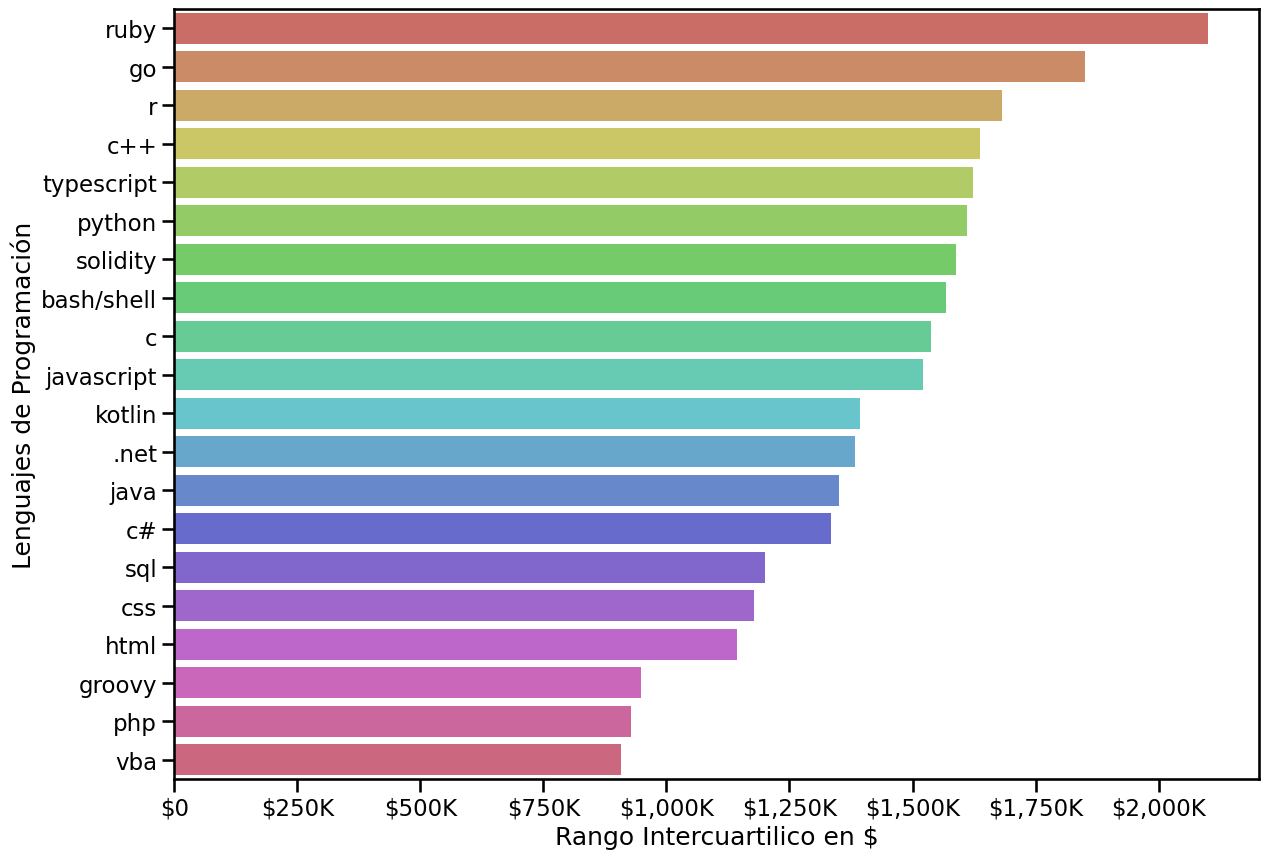

In [ ]:
# Calcular el rango intercuartílico para cada grupo de educación
_rango= df_final.groupby('programming_language')['salary_monthly_NETO'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25)).reset_index()
_rango= df_final.groupby('programming_language')['salary_monthly_NETO'].apply(lambda x: pd.Series({'percentil_25': np.percentile(x, 25), 'percentil_75': np.percentile(x, 75), 'rango_intercuartilico': np.percentile(x, 75) - np.percentile(x, 25)})).reset_index()
_rango.rename(columns={'salary_monthly_NETO':'Value'},inplace=True)
_rango=_rango[_rango['level_1']=='rango_intercuartilico']
_rango.sort_values(by=['Value'],ascending=False,inplace=True)

plt.subplots(figsize=(14, 10))
_barchart=sns.barplot(_rango, y=_rango.programming_language, x=_rango.Value,palette="hls", hue='programming_language')

# Formato de dólares con K para miles
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x) if x < 1000 else '${:,.0f}K'.format(x/1000))
plt.gca().xaxis.set_major_formatter(formatter)

_barchart.set_ylabel('Lenguajes de Programación')
_barchart.set_xlabel('Rango Intercuartilico en $')

_barchart

In [ ]:
_rango=_rango[(_rango['programming_language']=='ruby') | (_rango['programming_language']=='vba')]
_rango
for i in _rango['programming_language']:
    interquartile_range = _rango.loc[_rango['programming_language'] == i, 'Value']
    print(f'El rango intercuartílico para el lenguaje {i} es de ${interquartile_range.values[0]}')

El rango intercuartílico para el lenguaje ruby es de $2100000.0
El rango intercuartílico para el lenguaje vba es de $906743.75


Vemos que la variabilidad entre aquellos que están en el percentil 75 y el 25 para algunos lenguajes es muy alta. En el caso del lenguaje Ruby, existen más de 2.000.000 millones de diferencia entre el 75% de los que mas ganan y el 25%, mientras que en el caso de aquellos que programan con VBA, esa diferencia es tán solo de $900.000. Podría ser explicado por otras variables ajenas al lenguaje de programación utilizado.


En línea con esa información, si nos centramos solamente en el valor máximo registado para el campo de sueldo neto, los lenguajes que alcanzan ese valor, son Javascript,PHP y Python.

In [ ]:
df_final_max=df_final[df_final['salary_monthly_NETO'] == df_final['salary_monthly_NETO'].max()]
df_final_max

,programming_language,salary_monthly_NETO
352,bash/shell,4100000.0
353,javascript,4100000.0
354,python,4100000.0


Sin embargo, dada la dispersión de los datos, vemos que la probabilidad de ocurrencia de dichos eventos es mínima:

In [ ]:
_dict_max={}
is_above_avg = df_final['salary_monthly_NETO']== df_final['salary_monthly_NETO'].max() # lista de booleanos

for i in df_final_max['programming_language']:
  exp_greater_5 = df_final.programming_language == i  # lista debooleanos

  intersection_count = len(df_final[is_above_avg & exp_greater_5])
  exp_greater_5_count = len(df_final[ exp_greater_5])

  prob_cond_above_avg_dada_exp = len(df_final[is_above_avg & exp_greater_5]) / len(df_final[ exp_greater_5])

  _dict_max[i] = prob_cond_above_avg_dada_exp * 100

df_final_max = df_final_max.merge(pd.DataFrame(list(_dict_max.items()), columns=['programming_language', 'PROB']), on='programming_language', how='left')
df_final_max['PROB'] = (df_final_max['PROB'].round(2)).astype(str) + '%'
df_final_max.sort_values(by=['PROB'], ascending=False)

for i in df_final_max['programming_language']:
    _probabilidad = df_final_max.loc[df_final_max['programming_language'] == i, 'PROB']
    print(f'La probabilidad de ganar el sueldo máximo, según la distribución de los sueldos de dichos lenguajes: {i} es de {_probabilidad.values[0]}')



La probabilidad de ganar el sueldo máximo, según la distribución de los sueldos de dichos lenguajes: bash/shell es de 0.85%
La probabilidad de ganar el sueldo máximo, según la distribución de los sueldos de dichos lenguajes: javascript es de 0.25%
La probabilidad de ganar el sueldo máximo, según la distribución de los sueldos de dichos lenguajes: python es de 0.49%


Ahora, podemos tomar como "mejores salarios", al decil 90 de la distribución, y obtener la probabilidad de estar allí, dado el conocimiento de un lenguaje de programación en particular.

In [ ]:
_percentil_90 = df_final['salary_monthly_NETO'].quantile(0.90)
_percentil_90

2800000.0

In [ ]:
_dict={}
is_above_avg = df_final['salary_monthly_NETO'] > _percentil_90 #lista de booleanos

for i in df_final['programming_language']:
  exp_greater_5 = df_final.programming_language == i  #lista debooleanos

  intersection_count = len(df_final[is_above_avg & exp_greater_5])
  exp_greater_5_count = len(df_final[ exp_greater_5])

  prob_cond_above_avg_dada_exp = len(df_final[is_above_avg & exp_greater_5]) / len(df_final[ exp_greater_5])

  _dict[i] = prob_cond_above_avg_dada_exp * 100

_df_lenguajes = language_count.copy()
_df_lenguajes = _df_lenguajes.merge(pd.DataFrame(list(_dict.items()), columns=['frequency', 'PROBABILIDAD']), on='frequency', how='left')
_df_lenguajes = _df_lenguajes.sort_values(by=['PROBABILIDAD'], ascending=False)
_df_lenguajes['PROBABILIDAD'] = (_df_lenguajes['PROBABILIDAD'].round(2)).astype(str) + '%'
_df_lenguajes

,frequency,count,PROBABILIDAD
11,go,53,20.75%
12,ruby,25,20.0%
14,c++,17,17.65%
13,kotlin,24,16.67%
4,python,203,11.82%
3,typescript,215,11.16%
19,solidity,10,10.0%
18,groovy,10,10.0%
0,javascript,402,9.7%
8,java,96,9.38%


Podemos concluir entonces que, para maximizar la probabilidad de pertenecer al 10% de los que mas ganan considerando la modalidad Contractor y Freelance, y un empleo Full-Time, **es recomendable aprender el lenguaje de programación go, con una probabilidad de acceder a dicho decil del 20,75%, seguido por el Ruby con una probabilidad del 20%.**

## Ejercicio 2

En primer lugar, filtramos el dataframe nuevamente para obtener las observaciones, considerando una dedicación "Full-Time". Luego, nos quedamos con las observaciones que se encuentran en el percentil 0.97 y desconsideramos las observaciones que se encuentran en el percentil 0.01.


In [ ]:
_df2=df.copy()
_condition = _df2['work_dedication'] == 'Full-Time'
_df2 = _df2[_condition]

In [ ]:
_percentil_090 = _df2['salary_monthly_NETO'].quantile(.97)
_percentil_001 = _df2['salary_monthly_NETO'].quantile(0.01)

In [ ]:
_df2 = _df2[(_df2['salary_monthly_NETO'] <= _percentil_090) & (_df2['salary_monthly_NETO'] >= _percentil_001)]
_df2

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.0,207000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis
5,Argentina,Chaco,Full-Time,Staff (planta permanente),276000.0,229000.0,NaN,NaN,No,No recibo bono,...,Completo,Analista Universitario de Sistemas,UTN - Universidad Tecnológica Nacional,Responder sobre guardias,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,28,Varón Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,Argentina,Tucumán,Full-Time,Tercerizado (trabajo a través de consultora o ...,428692.0,355814.0,Mi sueldo está dolarizado (pero cobro en moned...,"249,24",No,No recibo bono,...,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,30,Varón Cis
5800,Argentina,Tucumán,Full-Time,Contractor,327000.0,275000.0,Cobro parte del salario en dólares,260,No,No recibo bono,...,En curso,Tecnicatura Superior en Programación,UTN - Universidad Tecnológica Nacional,Terminar encuesta,NaN,NaN,NaN,NaN,29,Hombre
5801,Argentina,Tucumán,Full-Time,Staff (planta permanente),620000.0,470000.0,NaN,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Prefiero no decir
5802,Argentina,Tucumán,Full-Time,Contractor,1500000.0,1150000.0,Cobro todo el salario en dólares,500,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,Varón Cis


Obtenemos nuevamente la totalidad de las columnas para seleccionar nuevamente aquellas que sean de nuestro interés.

In [ ]:
_df2.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

Seleccionamos las siguientes variables categóricas y numericas, además del salario:

Numéricas:
*   Años de experiencia
*   Edad
*   Años de experiencia en la compañia

Categóricas:
*   Nivel de estudio
*   Tipo de Contrato




In [ ]:
_relevant_columns_2 = [
    'profile_years_experience',
    'profile_studies_level',
    'profile_age',
    'work_years_in_company',
    'salary_monthly_NETO',
    'work_contract_type',
    'salary_has_bonus',
    'salary_monthly_BRUTO'
]

_df2 = _df2[_relevant_columns_2]
_df2.rename(columns={
    'work_contract_type': 'Contrato',
    'profile_years_experience': 'Experiencia_total',
    'work_years_in_company': 'Experiencia_compañia'
  },inplace=True)
_df2.dropna()

# Además, convertimos los valores de `Contrato` para que sean más cortos pero igual de representativos
_df2['Contrato'] = _df2['Contrato'].replace({
    'Staff (planta permanente)': 'Staff',
    'Tercerizado (trabajo a través de consultora o agencia)': 'Tercerizado',
    'Participación societaria en una cooperativa': 'Socio en cooperativa',
})

_df2.head()

<ipython-input-79-6d28806017eb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df2.rename(columns={
<ipython-input-79-6d28806017eb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df2['Contrato'] = _df2['Contrato'].replace({


,Experiencia_total,profile_studies_level,profile_age,Experiencia_compañia,salary_monthly_NETO,Contrato,salary_has_bonus,salary_monthly_BRUTO
0,10.0,NaN,36,1.0,520000.0,Staff,No,680000.0
1,23.0,Maestría,45,2.0,520000.0,Staff,No,650000.0
2,0.0,NaN,29,0.0,104000.0,Staff,No,125000.0
4,3.0,NaN,32,0.0,207000.0,Tercerizado,No,250000.0
5,1.0,Universitario,28,1.0,229000.0,Staff,No,276000.0


### Densidad Conjunta

Para analizar la densidad conjunta de dos variables podemos, por un lado, apoyarnos en la teoria de la probabilidad y obtener la misma para la ocurrencia dichos eventos, y por otro lado, analizarla a través de las herramientas de visualización. En el caso de variables categóricas, podemos hacer un análisis mediante tablas de contingencias.

Comenzamos analizando la probabilidad conjunta de la variable '**Contrato**' y la variable '**Nivel de Estudio**', exprensado la probabilidad en porcentajes.

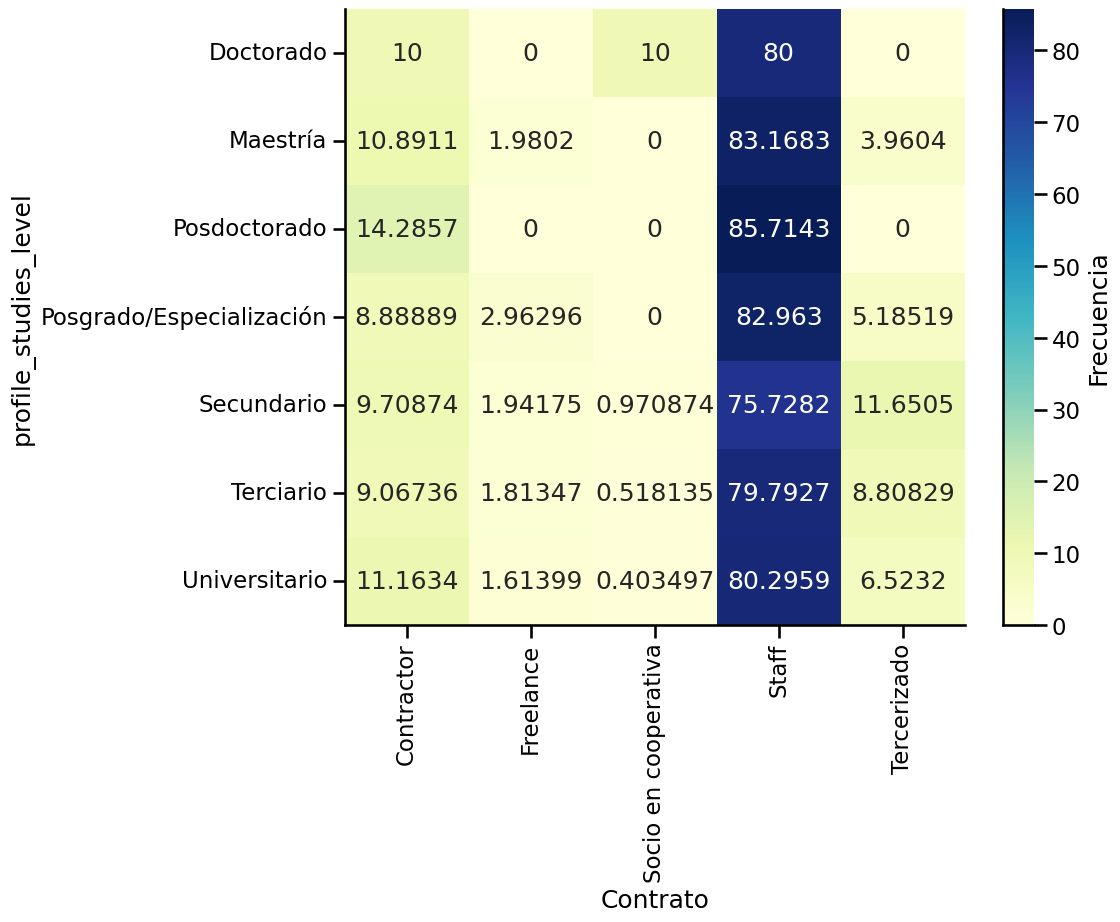

In [ ]:
# Tabla de contingencia
_tabla_1 = pd.crosstab(_df2['profile_studies_level'], _df2['Contrato'], normalize='index')
_tabla_1 = _tabla_1 * 100
_tabla_1

fig = plt.figure(figsize=(10,8))
sns.heatmap(_tabla_1, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Frecuencia'})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
sns.despine()

Al normalizar por fila, podemos decir por ejemplo, que la **probabilidad conjunta** de tener una **Maestria** y trabajar bajo la modalidad Staff es mayor que la probabilidad de tener título **secundario** y trabajar tambien bajo la modalidad Staff.

Ahora observamos las variables "**Tipo de Contrato**", y "**Edad**", expresando las probabilidad en porcentajes.

In [ ]:
# Tabla de contingencia
_df3 = _df2[_df2['profile_age']<50]
_tabla_2 = pd.crosstab(_df3['Contrato'].dropna(), _df3['profile_age'], normalize='index') # no están ordenados
_tabla_2 = _tabla_2 * 100
_tabla_2

profile_age,18,19,20,21,22,23,24,25,26,27,...,40,41,42,43,44,45,46,47,48,49
Contrato,,,,,,,,,,,,,,,,,,,,,
Contractor,0.000000,0.000000,0.905797,1.268116,1.992754,3.623188,2.355072,4.710145,4.710145,7.065217,...,2.898551,0.724638,1.811594,1.811594,1.630435,2.173913,0.362319,0.905797,1.086957,0.543478
Freelance,0.000000,2.564103,0.000000,0.000000,0.000000,2.564103,3.846154,3.846154,2.564103,6.410256,...,2.564103,1.282051,8.974359,1.282051,3.846154,0.000000,0.000000,1.282051,1.282051,0.000000
Socio en cooperativa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.347826,4.347826,...,4.347826,8.695652,4.347826,4.347826,0.000000,4.347826,0.000000,0.000000,4.347826,0.000000
Staff,0.026364,0.105457,0.263644,0.870024,1.581861,2.346428,3.031901,3.849196,5.272871,5.404693,...,3.401002,2.662800,2.662800,2.346428,1.950962,2.293699,1.898234,1.344582,1.212760,1.133667
Tercerizado,0.000000,0.000000,1.114206,1.949861,3.064067,5.013928,5.571031,4.735376,6.128134,6.406685,...,1.949861,2.506964,2.228412,1.949861,1.671309,0.557103,1.671309,1.392758,1.949861,0.000000


Allí tenemos la probabilidad conjunta de tener X cantidad de años de edad y estar contratado bajo los distintos tipos de contratos laborales.

<Axes: xlabel='Contrato', ylabel='count'>

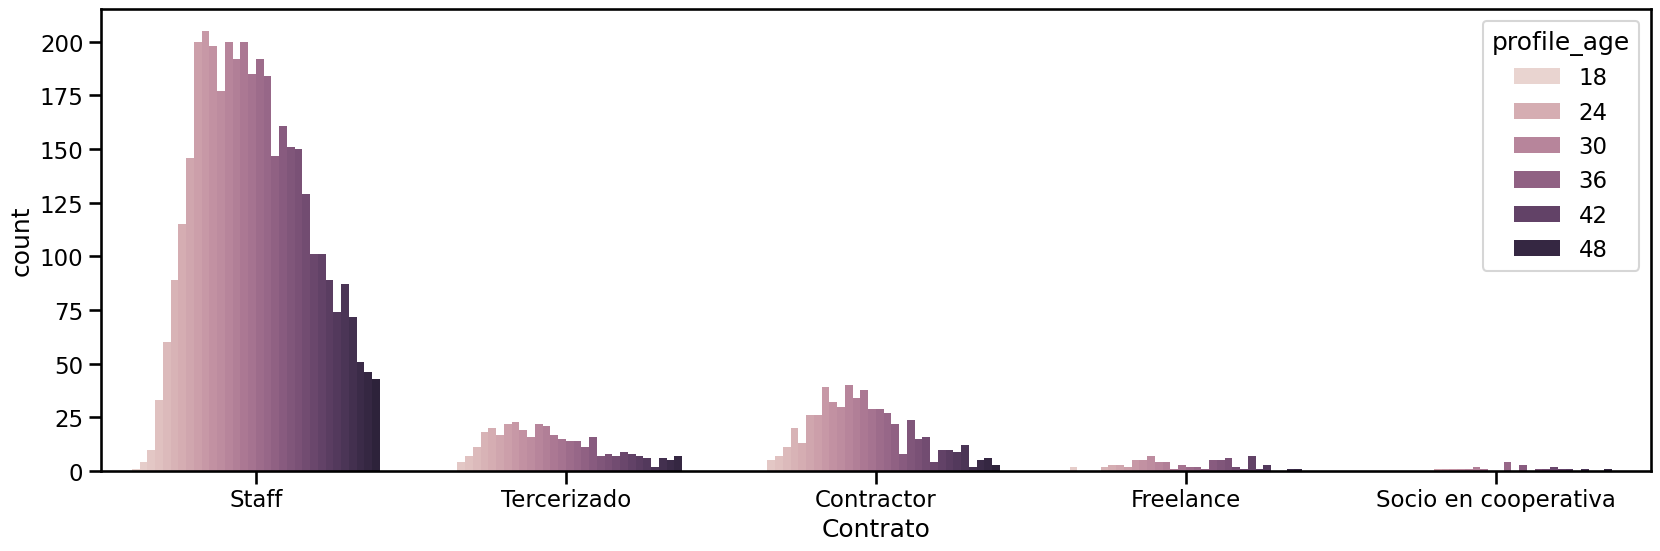

In [ ]:
fig = plt.figure(figsize=(20,6))
sns.countplot(x=_df3['Contrato'], hue=_df3['profile_age'] )

Vemos que la distribución para el caso de la modalidad "**Contractor**" y "**Staff**" tiene forma de una distribución normal.

### Asociación

Para analizar si existe una asociación entre el Salario Bruto Mensual y el Salario Neto Mensual, podemos en primer lugar, hacer una análisis exploratorio visual, para tratar de encontrar algún indicio o algún patrón que nos permita intuir algún grado de asociación y por ende, elegir algún estadístico o prueba que pueda ser útil para el caso. Por ejemplo, si no vemos una asociación lineal, y por el contrario hay un claro patrón que indica lo contrario, el coeficiente de correlación no nos servirá.

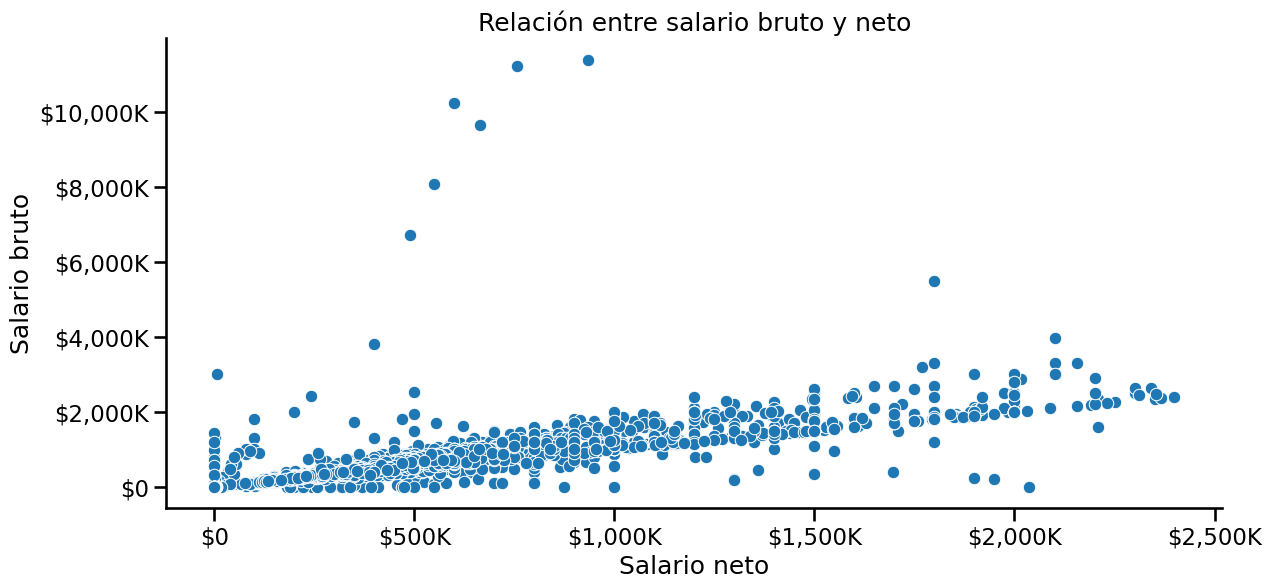

In [ ]:
g = sns.pairplot(data=_df2, y_vars=['salary_monthly_BRUTO'], x_vars=['salary_monthly_NETO'], aspect=2, height=6)

plt.title('Relación entre salario bruto y neto')
plt.xlabel('Salario neto')
plt.ylabel('Salario bruto')

formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x) if x < 1000 else '${:,.0f}K'.format(x/1000))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

Podemos observar a priori una relación lineal positiva entre ambas variables. Por ello, para comprobarlo estadísticamente, podemos calcular el coeficiente de correlación de Spearman y de Pearson. El primero, relaja el supuesto de normalidad de la distribución y es útil para elementos muestrales. El segundo, supone normalidad y distribución lineal.

In [ ]:
# Calcular la correlación de Spearman
correlation_coefficient, p_value = spearmanr(_df2['salary_monthly_BRUTO'], _df2['salary_monthly_NETO'])
print("El Coeficiente de correlación de Spearman es igual a:", correlation_coefficient)

El Coeficiente de correlación de Spearman es igual a: 0.9253678196306425


In [ ]:
# Calcular la correlación de Spearman
correlation_coefficient, p_value = pearsonr(_df2['salary_monthly_BRUTO'], _df2['salary_monthly_NETO'])
print("El Coeficiente de correlación de Pearson es igual a:", correlation_coefficient)

El Coeficiente de correlación de Pearson es igual a: 0.7528138383433578


Ambos coeficientes dan un valor alto y por ende estamos ante *presencia de correlación lineal positiva entre ambas variables*. Por ello, si es deseable, **puede prescindirse de alguna de las dos variables, ya que al estar correlacionadas, cualquiera de ellas captura el efecto de la otra**.

### Densidad Condicional

Filtramos el Dataframe y acotamos la muestra al nivel de estudios **Universitario** y **Maestria**.

In [ ]:
_df_estudios = _df2[(_df2['profile_studies_level'] == 'Universitario') | (_df2['profile_studies_level'] == 'Maestría')]
_df_estudios

,Experiencia_total,profile_studies_level,profile_age,Experiencia_compañia,salary_monthly_NETO,Contrato,salary_has_bonus,salary_monthly_BRUTO
1,23.0,Maestría,45,2.0,520000.0,Staff,No,650000.00
5,1.0,Universitario,28,1.0,229000.0,Staff,No,276000.00
7,11.0,Maestría,34,2.0,312000.0,Staff,Un sueldo,364000.00
11,14.0,Universitario,43,13.0,600000.0,Staff,No,875000.00
12,1.5,Universitario,24,1.5,181441.8,Staff,No,197161.41
...,...,...,...,...,...,...,...,...
5788,2.0,Universitario,31,2.0,215000.0,Staff,No,267000.00
5794,3.0,Maestría,25,1.0,571000.0,Staff,No,712000.00
5795,13.0,Universitario,40,8.0,491000.0,Staff,No,660000.00
5799,1.5,Universitario,30,1.5,355814.0,Tercerizado,No,428692.00


Hacemos un análisis visual de la distribución de cada para cada nivel de estudio.

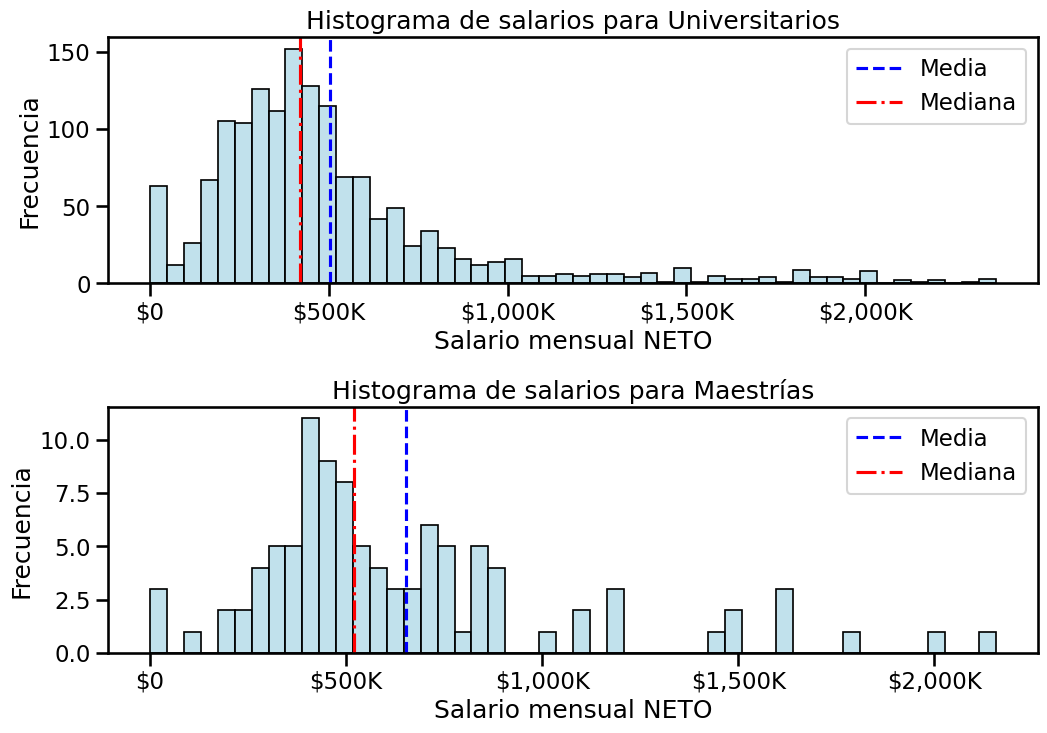

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(12, 8)) # se genera la figura, se divide en dos lugares y se define su tamaño

_df_universitario = _df2[_df2['profile_studies_level'] == 'Universitario']
_df_maestria = _df2[_df2['profile_studies_level'] == 'Maestría']

sns.histplot(data=_df_universitario,x=_df_universitario['salary_monthly_NETO'], bins=50, ax=axes[0], color='lightblue')
sns.histplot(data=_df_maestria,x=_df_maestria['salary_monthly_NETO'], bins=50, ax=axes[1], color='lightblue')

# Añadir etiquetas a los ejes y título
axes[0].set_xlabel('Salario mensual NETO')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de salarios para Universitarios')

axes[1].set_xlabel('Salario mensual NETO')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de salarios para Maestrías')

axes[0].axvline(_df_universitario['salary_monthly_NETO'].mean(), color='blue', linestyle='--', label='Media')
axes[0].axvline(_df_universitario['salary_monthly_NETO'].median(), color='red', linestyle='-.', label='Mediana')
axes[1].axvline(_df_maestria['salary_monthly_NETO'].mean(), color='blue', linestyle='--', label='Media')
axes[1].axvline(_df_maestria['salary_monthly_NETO'].median(), color='red', linestyle='-.', label='Mediana')

# Configurar el formato del eje x
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x) if x < 1000 else '${:,.0f}K'.format(x / 1000))
axes[0].xaxis.set_major_formatter(formatter)
axes[1].xaxis.set_major_formatter(formatter)

axes[0].legend()
axes[1].legend()

plt.subplots_adjust(hspace=0.5)

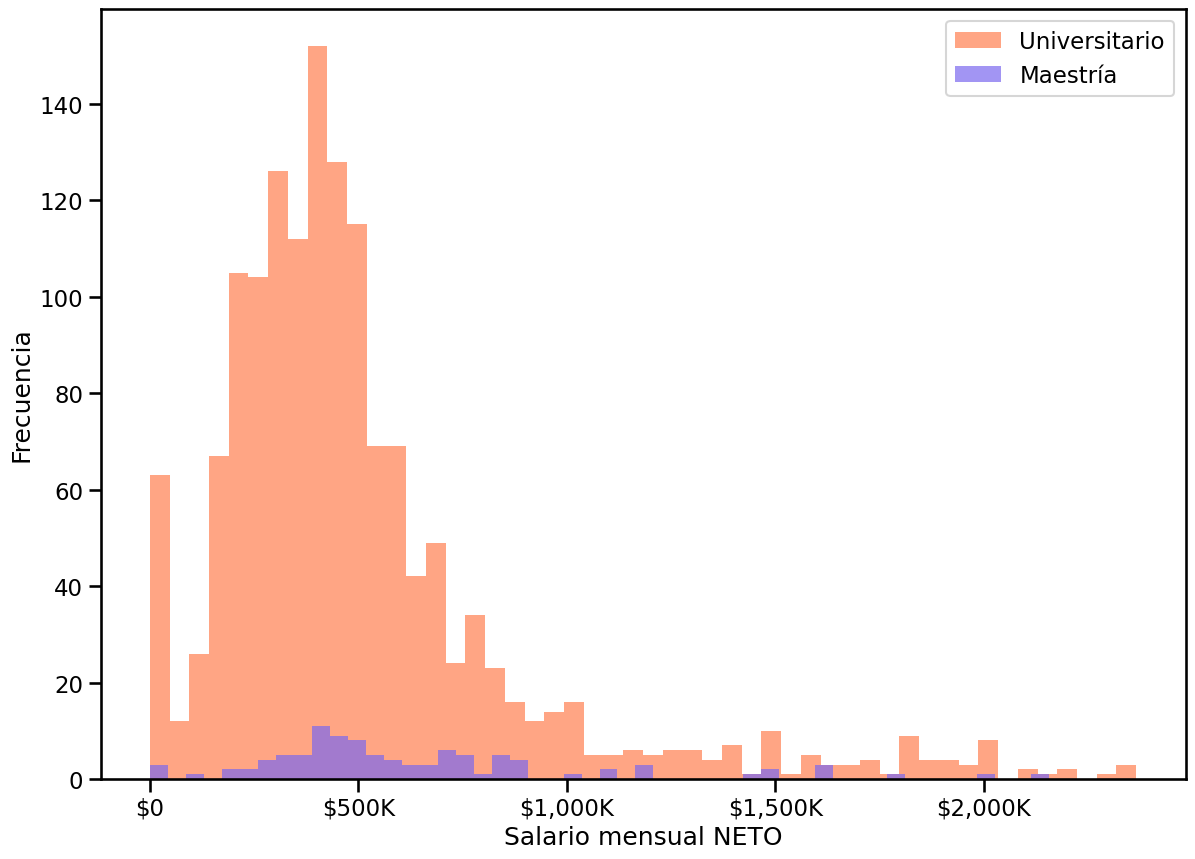

In [ ]:
fig, axes = plt.subplots(nrows=1, figsize=(14, 10))
df_H= _df2[ _df2['profile_studies_level']=='Universitario']
df_M=_df2[ _df2['profile_studies_level']=='Maestría']

plt.hist(df_H['salary_monthly_NETO'], color='coral', bins=50,label='Universitario',alpha=0.7)
plt.hist(df_M['salary_monthly_NETO'], color='mediumslateblue', bins=50,label='Maestría',alpha=0.7)
# Configurar el formato del eje x
formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x) if x < 1000 else '${:,.0f}K'.format(x / 1000))
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel('Salario mensual NETO')
plt.ylabel('Frecuencia')

plt.legend()

plt.show()

Vemos que en el caso de aquellos trabajadores que tienen nivel Universitario, la distribución de los salarios tienen una forma más parecida a una distribución normal, mientras que en el caso de aquellos que tienen nivel de Maestria, la distribución es más dispersa, pudiendo observarlo tambien con la diferencia mayor entre la media y la mediana en el segundo caso. Si embargo, ambos grupos tienen valores en la cola derecha de la distribución.

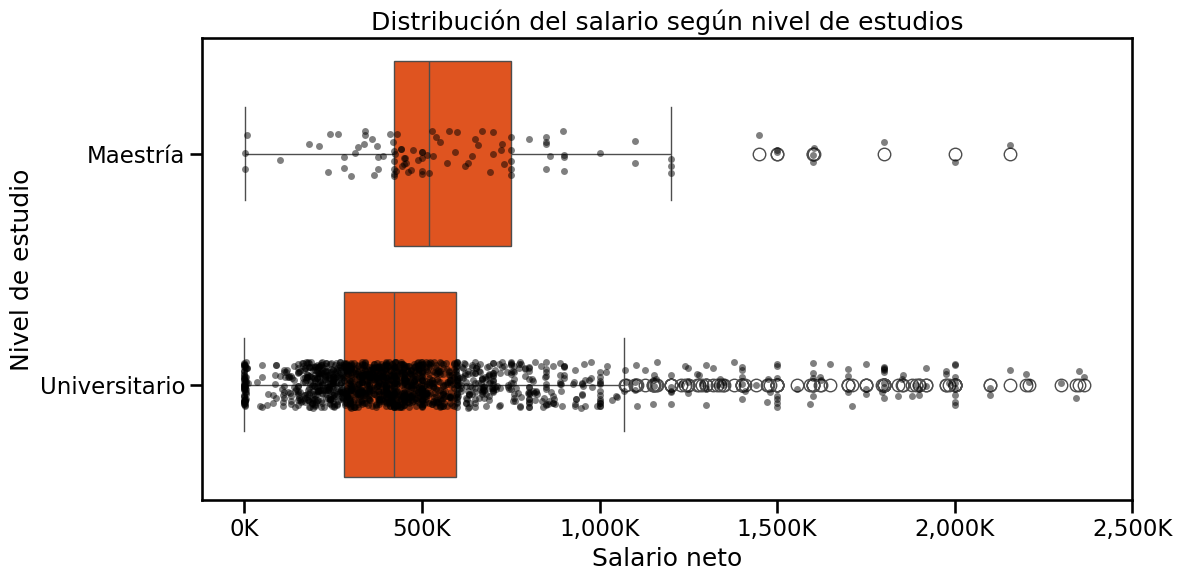

In [ ]:
plt.figure(figsize=(12, 6))

g = sns.boxplot(data=_df_estudios, x='salary_monthly_NETO', y='profile_studies_level', color='orangered')
sns.stripplot(data=_df_estudios,x='salary_monthly_NETO',y='profile_studies_level', color='black', alpha=0.5)

plt.title('Distribución del salario según nivel de estudios')
plt.xlabel('Salario neto')
plt.ylabel('Nivel de estudio')

# Para que los ticks del eje x se vean mejor y con K para indicar miles
tick_diff = 500_000
g.set_xticks(np.arange(0, _df_estudios['salary_monthly_NETO'].max() + tick_diff, tick_diff))
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

plt.show()

Ahora, podemos tambien calcular las probabilidades, utilizando la fórmula de la probabilidad condicional, que no es más que la probabilidad conjunta sobre la probabilidad del evento condicionante.

In [ ]:
_quantiles=_df_estudios['salary_monthly_NETO'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
quantiles_dict = {}
for q, value in _quantiles.items():
    quantiles_dict[q] = value

quantiles_dict
_dict={}
for language in _df_estudios['profile_studies_level']:
    for q in quantiles_dict:
        is_above_quantile = _df_estudios['salary_monthly_NETO'] > quantiles_dict[q]
        exp_equal_language = _df_estudios['profile_studies_level'] == language
        intersection_count = len(_df_estudios[is_above_quantile & exp_equal_language])
        exp_equal_language_count = len(_df_estudios[exp_equal_language])
        prob_cond_above_avg_dada_exp=(intersection_count/exp_equal_language_count)*100
        _dict[(language, q)] = f"La probabilidad de estar en el {q} Quantile, dado el nivel de estudio {language}, es: {prob_cond_above_avg_dada_exp:.2f}%"
_dict

{('Maestría',
  0.1): 'La probabilidad de estar en el 0.1 Quantile, dado el nivel de estudio Maestría, es: 96.04%',
 ('Maestría',
  0.2): 'La probabilidad de estar en el 0.2 Quantile, dado el nivel de estudio Maestría, es: 92.08%',
 ('Maestría',
  0.3): 'La probabilidad de estar en el 0.3 Quantile, dado el nivel de estudio Maestría, es: 87.13%',
 ('Maestría',
  0.4): 'La probabilidad de estar en el 0.4 Quantile, dado el nivel de estudio Maestría, es: 78.22%',
 ('Maestría',
  0.5): 'La probabilidad de estar en el 0.5 Quantile, dado el nivel de estudio Maestría, es: 69.31%',
 ('Maestría',
  0.6): 'La probabilidad de estar en el 0.6 Quantile, dado el nivel de estudio Maestría, es: 57.43%',
 ('Maestría',
  0.7): 'La probabilidad de estar en el 0.7 Quantile, dado el nivel de estudio Maestría, es: 46.53%',
 ('Maestría',
  0.8): 'La probabilidad de estar en el 0.8 Quantile, dado el nivel de estudio Maestría, es: 35.64%',
 ('Maestría',
  0.9): 'La probabilidad de estar en el 0.9 Quantile, dado

Luego, suponemos independencia, y entonces la probabilidad condicional sería simplemente la probabilidad de ocurrencia del evento al que relacionamos con el evento condicionante.

In [ ]:
_quantiles=_df_estudios['salary_monthly_NETO'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
quantiles_dict = {}
for q, value in _quantiles.items():
    quantiles_dict[q] = value

quantiles_dict
_dict={}
for q in quantiles_dict:
  is_above_quantile = _df_estudios['salary_monthly_NETO'] > quantiles_dict[q]
  intersection_count = len(_df_estudios[is_above_quantile])
  exp_equal_language_count = len(_df_estudios)
  prob_cond_above_avg_dada_exp = (intersection_count / exp_equal_language_count) * 100
  _dict[q] = f"La probabilidad de estar en el {q} Quantile es: {prob_cond_above_avg_dada_exp:.2f}%"
_dict

{0.1: 'La probabilidad de estar en el 0.1 Quantile es: 89.92%',
 0.2: 'La probabilidad de estar en el 0.2 Quantile es: 79.91%',
 0.3: 'La probabilidad de estar en el 0.3 Quantile es: 69.96%',
 0.4: 'La probabilidad de estar en el 0.4 Quantile es: 60.01%',
 0.5: 'La probabilidad de estar en el 0.5 Quantile es: 49.87%',
 0.6: 'La probabilidad de estar en el 0.6 Quantile es: 39.92%',
 0.7: 'La probabilidad de estar en el 0.7 Quantile es: 29.91%',
 0.8: 'La probabilidad de estar en el 0.8 Quantile es: 20.03%',
 0.9: 'La probabilidad de estar en el 0.9 Quantile es: 10.01%'}

Al calcular la probabilidad condicional de estar en cada uno de los deciles dado que el nivel de estudios alcanzados es Universitario, encontramos que los valores son muy cercanos a la probabilidad marginal de estar en cada uno de los deciles, por ende podríamos considerar independencia. Sin embargo, cuando calculamos para el nivel de Maestria, la probabilidad condicional no es igual ni cercana a la probabilidad marginal del decil. *Podemos concluir, por ejemplo, que la probabilidad de estar en el decil de mayores ingresos es mayor teniendo un nivel de estudios de Maestría que teniendo un nivel Universitario.*


### Densidad Conjunta Condicional

Vamos a considerar las variables numéricas "Salario Neto Mensual" y "Años de experiencia en la empresa" en conjunto con el nivel de estudios. Utilizamos un Joinplot, ya que nos otorga una mayor visual que un Scatterpot.

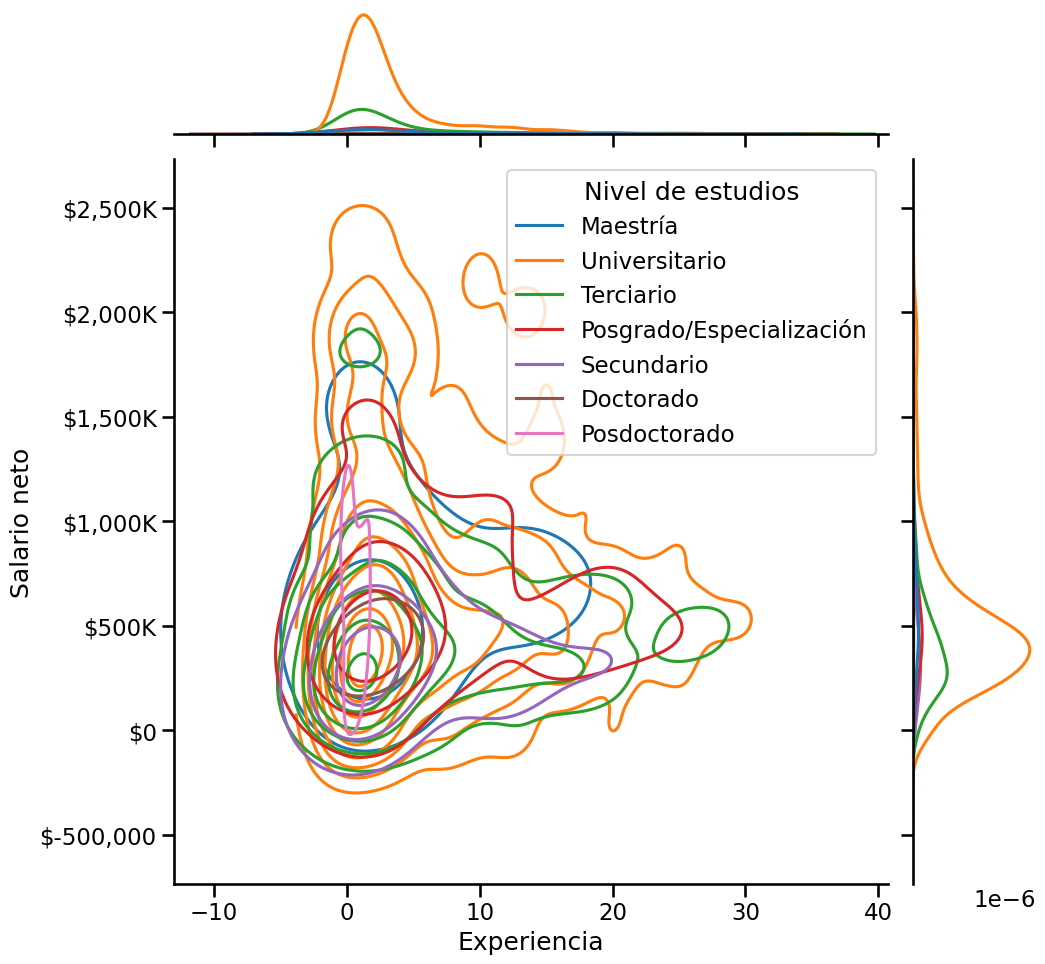

In [ ]:
sns.jointplot(data=_df2, x='Experiencia_compañia', y='salary_monthly_NETO', hue='profile_studies_level', kind='kde', height=10)

formatter = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x) if x < 1000 else '${:,.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Experiencia')
plt.ylabel('Salario neto')

plt.gca().legend_.set_title('Nivel de estudios')

plt.show()

Observamos primeramente las distribuciones marginales de cada variable, graficadas en los ejes. Notamos como para el nivel Universitario y Terciarios, las distribuciones tienen forma de una normal.
Por otro lado, al mirar el gráfico, podemos apreciar una cierta relación positiva entre la variable salario y experiencia en la compañia, sobretodo para el nivel Universitario y Posgrado/Especialización. No así por ejemplo para el nivel de Doctorado, para el cual se aprecia un conjunto de datos en sentido vertical, pariendo ser un patrón de correlación nula.

Por último, calculamos las probabilidades conjuntas condicionales, considerando los deciles de salario y experiencia, dados 3 niveles de estudio en particular: **Maestría**, **Universitario** y **Terciario**.

In [ ]:
_niveles_estudio = ['Maestría', 'Universitario','Terciario']
_deciles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
_dict_results={}
for _nivel in _niveles_estudio:
    _df_nivel = _df2[_df2['profile_studies_level'] == _nivel]
    for q in _deciles:
      # Calcular el primer decil del salario mensual neto para este subconjunto de datos
      primer_decil_salary = _df_nivel['salary_monthly_NETO'].quantile(q)
      primer_decil_exp = _df_nivel['Experiencia_compañia'].quantile(q)

      # Filtrar nuevamente el DataFrame para obtener solo las filas donde tanto salary_monthly_NETO como Experiencia_compañia están en el primer decil
      primer_decil_df = _df_nivel[(_df_nivel['salary_monthly_NETO'] <= primer_decil_salary) & (_df_nivel['Experiencia_compañia'] <=primer_decil_exp)]

      # Calcular la probabilidad
      probabilidad_conjunta = len(primer_decil_df) / len(_df_nivel)

      _dict_results[_nivel,q]=f"La probabilidad conjunta condicional de estar en los deciles {q} de salario y experiencia' dado el nivel {_nivel}': {probabilidad_conjunta}"

_dict_results


{('Maestría',
  0.1): "La probabilidad conjunta condicional de estar en los deciles 0.1 de salario y experiencia' dado el nivel Maestría': 0.039603960396039604",
 ('Maestría',
  0.2): "La probabilidad conjunta condicional de estar en los deciles 0.2 de salario y experiencia' dado el nivel Maestría': 0.04950495049504951",
 ('Maestría',
  0.3): "La probabilidad conjunta condicional de estar en los deciles 0.3 de salario y experiencia' dado el nivel Maestría': 0.1188118811881188",
 ('Maestría',
  0.4): "La probabilidad conjunta condicional de estar en los deciles 0.4 de salario y experiencia' dado el nivel Maestría': 0.27722772277227725",
 ('Maestría',
  0.5): "La probabilidad conjunta condicional de estar en los deciles 0.5 de salario y experiencia' dado el nivel Maestría': 0.33663366336633666",
 ('Maestría',
  0.6): "La probabilidad conjunta condicional de estar en los deciles 0.6 de salario y experiencia' dado el nivel Maestría': 0.45544554455445546",
 ('Maestría',
  0.7): "La probabil